In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename (columns = {"Annual Income (k$)" : "income", "Age" : "age", "Spending Score (1-100)" : "score"}, inplace = True)

In [5]:
df.head()

,CustomerID,Gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.drop("CustomerID", axis = 1)

In [7]:
df.head()

,Gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.to_csv("new.csv")

In [9]:
df.describe() #descriptive data

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.age.std() #standard deviation

13.969007331558883

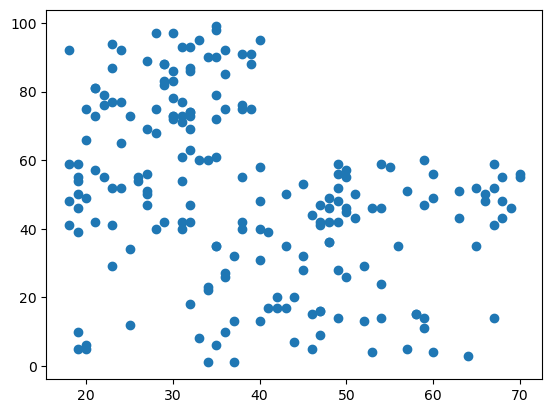

In [11]:
# viz
plt.scatter(df.age, df.score)

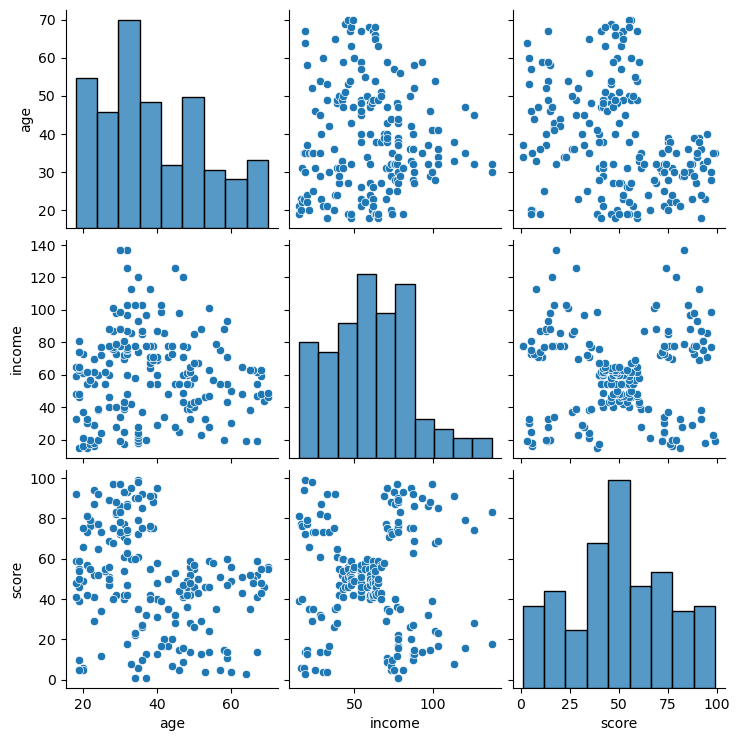

In [12]:
#pair plot
import seaborn as sns
sns.pairplot(df[["age", "income", "score"]])

# kmeans cluster

In [13]:
import sklearn.cluster as cls
kmeans = cls.KMeans() # default, n-clustered

In [14]:
predicted = kmeans.fit_predict(df[["income", "score"]])

In [15]:
predicted

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1, 1, 1, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 2, 5, 6, 5, 2, 5, 2, 5,
       6, 5, 2, 5, 2, 5, 2, 5, 2, 5, 6, 5, 2, 5, 6, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 6, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3, 7, 3,
       7, 3])

In [16]:
df['cluster_1'] = predicted

In [17]:
df.head()

,Gender,age,income,score,cluster_1
0,Male,19,15,39,4
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,4


In [18]:
df.tail()

,Gender,age,income,score,cluster_1
195,Female,35,120,79,3
196,Female,45,126,28,7
197,Male,32,126,74,3
198,Male,32,137,18,7
199,Male,30,137,83,3


In [19]:
center = kmeans.cluster_centers_

In [20]:
center

array([[ 25.0952381 ,  80.04761905],
       [ 46.73809524,  50.78571429],
       [ 79.73913043,  13.39130435],
       [109.7       ,  82.        ],
       [ 25.14285714,  19.52380952],
       [ 78.55172414,  82.17241379],
       [ 63.36363636,  47.38636364],
       [109.7       ,  22.        ]])

In [21]:
df0 = df[df.cluster_1 == 0]
df1 = df[df.cluster_1 == 1]
df2 = df[df.cluster_1 == 2]
df3 = df[df.cluster_1 == 3]
df4 = df[df.cluster_1 == 4]
df5 = df[df.cluster_1 == 5]
df6 = df[df.cluster_1 == 6]
df7 = df[df.cluster_1 == 7]

In [22]:
df0.shape

(21, 5)

In [23]:
df2.shape

(23, 5)

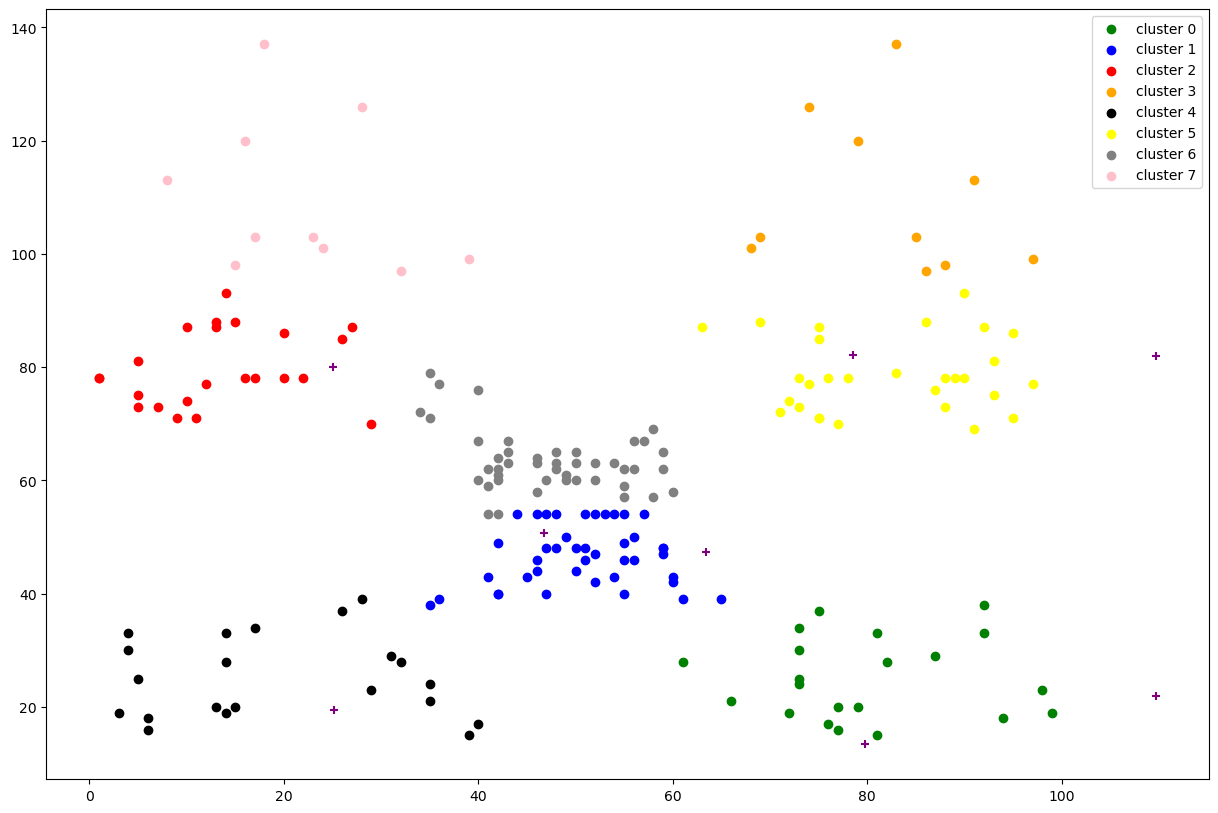

In [24]:
plt.figure(figsize=(15, 10))
plt.scatter(df0["score"], df0["income"], color = "green", label = "cluster 0")
plt.scatter(df1["score"], df1["income"], color = "blue", label = "cluster 1")
plt.scatter(df2["score"], df2["income"], color = "red", label = "cluster 2")
plt.scatter(df3["score"], df3["income"], color = "orange", label = "cluster 3")
plt.scatter(df4["score"], df4["income"], color = "black", label = "cluster 4")
plt.scatter(df5["score"], df5["income"], color = "yellow", label = "cluster 5")
plt.scatter(df6["score"], df6["income"], color = "grey", label = "cluster 6")
plt.scatter(df7["score"], df7["income"], color = "pink", label = "cluster 7")

plt.scatter(center[:,0], center[:,1], color = "purple", marker = "+")

plt.legend()

# Select Optimal Number of clusters

In [25]:
wcss = []
clusters = range(1, 15)
for k in clusters:
    km = cls.KMeans(n_clusters = k)
    km.fit(df[['score', 'income']])
    wcss.append(km.inertia_)
    

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30241.343617936585,
 25018.576334776335,
 21818.114588452183,
 19705.950272915492,
 17508.970577400072,
 15845.619372815676,
 14589.015037740039,
 12797.180630643867]

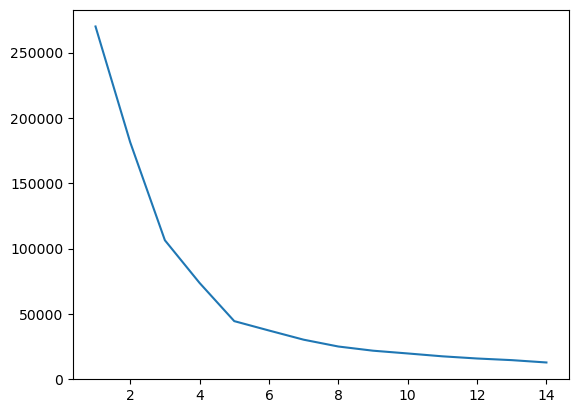

In [27]:
plt.plot(clusters, wcss)

In [28]:
#knee
!pip install kneed

In [29]:
from kneed import KneeLocator
kn = KneeLocator(clusters, wcss, curve = "convex", direction = "decreasing")

In [30]:
kn.knee

5

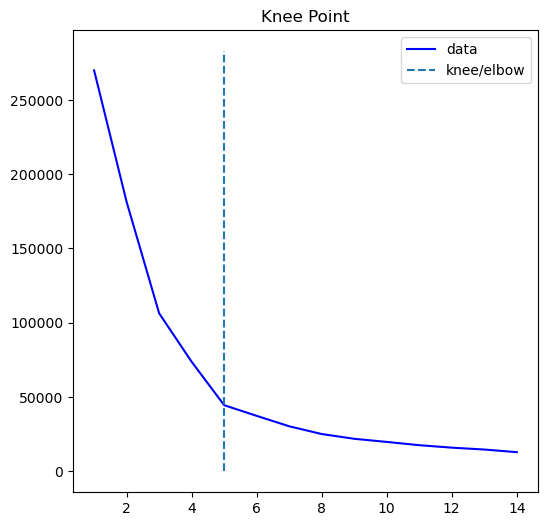

In [31]:
kn.plot_knee()

In [32]:
kmeans2 = cls.KMeans(n_clusters = 5) # n-clustered = 5
predicted2 = kmeans2.fit_predict(df[["income", "score"]])

In [33]:
df["finalcluster"] = df["cluster_1"]

In [34]:
df.drop(['finalcluster', "cluster_1"], axis = 1, inplace = True)

In [35]:
df["new_cluster"] = predicted2

In [36]:
df.head()

,Gender,age,income,score,new_cluster
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0


In [37]:
center2 = kmeans2.cluster_centers_
center2

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [38]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

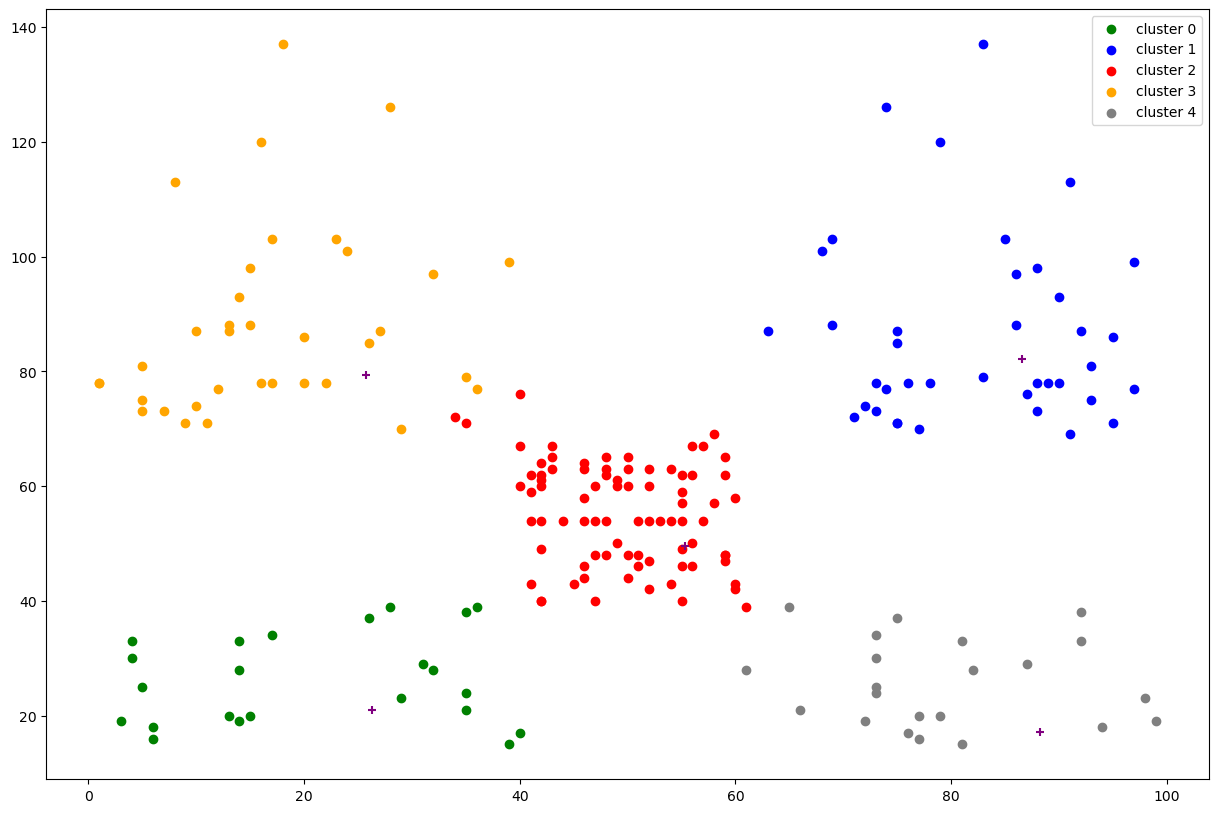

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(df0['score'], df0['income'], color='green', label='cluster 0')
plt.scatter(df1['score'], df1['income'], color='blue', label='cluster 1')
plt.scatter(df2['score'], df2['income'], color='red', label='cluster 2')
plt.scatter(df3['score'], df3['income'], color='orange', label='cluster 3')
plt.scatter(df4['score'], df4['income'], color='gray', label='cluster 4')

plt.scatter(center2[:,0] , center2[:,1], color='purple', marker='+')

plt.legend()

In [43]:
kmeans2.predict([[125, 30]])

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])